Aim:
format the data and merge them in one table

In [6]:
import pandas as pd
import numpy as np
import datetime as dt
import os
import re
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [7]:
def to_df(source):
    df = pd.DataFrame()
    for i in source:
        df = df.append(pd.read_csv(i), sort= True)
    return df

In [14]:
v = pd.read_csv('VkerDB.csv', usecols=['date']).max()[0]
print('Latest date in the datebase: {}'.format(v))

Latest date in the datebase: 2019-12-15


In [25]:
#choose the file to import to df
h = sorted([i for i in os.listdir() if 'Hu_Vker' in i])
co = sorted([i for i in os.listdir() if 'Com_Vker' in i])
ce = sorted([i for i in os.listdir() if 'Cen_Vker' in i])
print('Hu:', h)
print('Com:', co)
print('Cen', ce)

Hu: ['Hu_Vker2019-12-02.csv', 'Hu_Vker2019-12-09.csv', 'Hu_Vker2019-12-15.csv', 'Hu_Vker2020-01-27.csv']
Com: ['Com_Vker2019-12-02.csv', 'Com_Vker2019-12-09.csv', 'Com_Vker2019-12-15.csv', 'Com_Vker2020-01-27.csv']
Cen ['Cen_Vker2019-12-02.csv', 'Cen_Vker2019-12-09.csv', 'Cen_Vker2019-12-15.csv', 'Cen_Vker2020-01-27.csv']


In [26]:
for i in h:
    print(re.findall('\d{4}.\d{1,2}.\d{1,2}',i)[0])

2019-12-02
2019-12-09
2019-12-15
2020-01-27


In [27]:
#select the files to load
Hun = to_df(h[-1:])
Com = to_df(co[-1:])
Cen = to_df(ce[-1:])
print('Shape of Hun',Hun.shape)
print('Shape of Com',Com.shape)
print('Shape of Cen',Cen.shape)

Shape of Hun (140, 9)
Shape of Com (341, 11)
Shape of Cen (32, 10)


#### clean up the source data

In [55]:
Hun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 10 columns):
agency         101 non-null object
date           140 non-null object
description    140 non-null object
id             140 non-null int64
price          140 non-null float64
room           140 non-null int64
source         140 non-null object
sqm            140 non-null int64
url            140 non-null object
price_sqm      140 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 11.0+ KB


In [29]:
Hun.isnull().sum()

agency         39
date            0
description     0
id              0
price           0
room            0
source          0
sqm             0
url             0
dtype: int64

In [18]:
Hun.loc[Hun['sqm'].isnull()]

,agency,date,description,id,price,room,source,sqm,url


In [19]:
#delete the extra rows
Hun.drop(Hun.loc[Hun['sqm'].isnull()].index, axis = 0, inplace= True)
Hun.shape

(91, 9)

In [30]:
#create 'price_sqm' column
Hun['price_sqm'] = Hun['price'] / Hun['sqm']
Hun['price_sqm'] = Hun['price_sqm'].astype(int)
Hun['price'] = Hun['price'] / 1000000.0

In [31]:
Hun['date'].value_counts()

2020-01-19    38
2020-01-26    31
2020-01-13    25
2020-01-06    24
2019-12-22    22
Name: date, dtype: int64

In [32]:
Com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 11 columns):
agency         46 non-null object
date           341 non-null object
description    0 non-null float64
id             341 non-null int64
price          341 non-null float64
price_sqm      341 non-null int64
region         341 non-null object
room           341 non-null int64
source         341 non-null object
sqm            341 non-null int64
url            341 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 29.4+ KB


In [33]:
Com.isnull().sum()

agency         295
date             0
description    341
id               0
price            0
price_sqm        0
region           0
room             0
source           0
sqm              0
url              0
dtype: int64

In [34]:
Com.head(3)

,agency,date,description,id,price,price_sqm,region,room,source,sqm,url
0,NaN,2020-01-06,NaN,30301385,22.8,844444,"Szent István körút, V. kerület",1,com,27,https://ingatlan.com/v-ker/elado+lakas/tegla-e...
1,NaN,2020-01-06,NaN,29700953,24.9,957692,"Kálmán Imre utca 21, V. kerület",1,com,26,https://ingatlan.com/v-ker/elado+lakas/tegla-e...
2,NaN,2020-01-06,NaN,30407710,25.9,996154,"Lipótváros, V. kerület",1,com,26,https://ingatlan.com/v-ker/elado+lakas/tegla-e...


In [35]:
Cen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 10 columns):
agency         0 non-null float64
date           32 non-null object
description    32 non-null object
id             32 non-null int64
price          32 non-null float64
region         32 non-null object
room           32 non-null int64
source         32 non-null object
sqm            32 non-null int64
url            32 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 2.6+ KB


In [36]:
Cen.isnull().sum()

agency         32
date            0
description     0
id              0
price           0
region          0
room            0
source          0
sqm             0
url             0
dtype: int64

In [37]:
Cen['price_sqm'] = Cen['price']*1000000 / Cen['sqm']
Cen['price_sqm'] = Cen['price_sqm'].astype(int)

In [38]:
Cen.head(3)

,agency,date,description,id,price,region,room,source,sqm,url,price_sqm
0,NaN,2020-01-06,Felújított kislakás a belváros legjobb részén\...,14653809,29.9,H400059,1,centrum,28,https://www.oc.hu/ingatlanok/H400059?c=1b06e8e0,1067857
1,NaN,2020-01-06,Garzonlakás a Váci utcában\nFelújítandó egy sz...,12625576,44.3,H387534,1,centrum,33,https://www.oc.hu/ingatlanok/H387534?c=1b06e8e0,1342424
2,NaN,2020-01-06,Rejtett kis ékszerdoboz várja következő tulajd...,13617162,34.9,H394360,1,centrum,31,https://www.oc.hu/ingatlanok/H394360?c=1b06e8e0,1125806


#### create one DB

In [39]:
VkerDB = pd.concat([Hun,Com,Cen], axis = 0, sort = True, ignore_index = True)
VkerDB.shape

(513, 11)

In [19]:
# cleaning-up 'room'
VkerDB['room'].value_counts()

1.0    91
2.0     4
0.0     1
Name: room, dtype: int64

In [47]:
VkerDB.duplicated().sum()

0

In [48]:
VkerDB.loc[VkerDB['room'] == '1 + 1 félszoba', 'room'] = 1.5
VkerDB['room'] = VkerDB['room'].astype(float)
VkerDB.loc[VkerDB['room'] == 0.0, 'room'] = 1.0

/home/trismegistos/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [49]:
VkerDB['room'].value_counts()

1.0    490
2.0     23
Name: room, dtype: int64

In [69]:
#Type is not informative, delete from data extraction
#VkerDB.drop(['type'], axis = 1, inplace= True)

In [53]:
#cleaning-up agency
VkerDB['agency'].value_counts()

Saját hirdetés                              46
CDC Ingatlan IV.Ker. Szita Ingatlan Kft.    22
Gold House Ingatlaniroda                    15
CDC Báthory                                 13
GDN Ingatlaniroda.                          11
Cdci Teréz krt-i iroda                       9
CDC Bokréta                                  7
Otthon Centrum - Andrássy út                 4
City Cartel - XI. ker, Hegyalja út           4
OTP Ingatlanpont Hűvösvölgyi út              3
AL-MA Digital Kft                            3
GREAT HOME                                   3
SteirerHomes                                 2
OTP Ingatlanpont Szépvölgyi út               2
Homexpress Ingatlaniroda                     2
Duna House - Óhegy                           1
Name: agency, dtype: int64

In [54]:
VkerDB.isnull().sum()

agency         366
date             0
description    341
id               0
price            0
price_sqm        0
region         140
room             0
source           0
sqm              0
url              0
dtype: int64

In [56]:
# reorganise columns
VkerDB = VkerDB[['id', 'date', 'price', 'price_sqm', 'room', 'sqm','region','description','agency', 'source','url']]

In [57]:
Dbfull = pd.read_csv('VkerDB.csv')
print('No of before ads: ',Dbfull.shape)
alls = pd.concat([Dbfull,VkerDB], axis = 0, ignore_index= True)
print('No of ads after: {}'.format(alls.shape))

No of before ads:  (3196, 11)
No of ads after: (3709, 11)


In [58]:
#archive data
#alls.to_csv('VkerDB.csv', index=False, index_label=None)

In [59]:
counts = sorted(zip(alls['date'].value_counts().index,alls['date'].value_counts()))

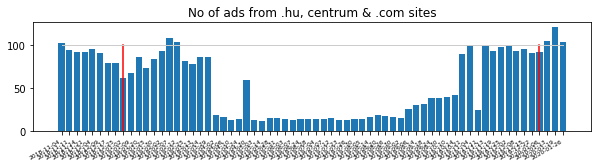

In [79]:
fig = plt.figure(figsize=(10,2))
plt.bar([i[0] for i in counts],[i[1] for i in counts])
plt.plot((counts[8][0], counts[8][0]),(0,100), c= 'r')
plt.plot((counts[62][0], counts[62][0]),(0,100), c= 'r')
plt.plot([counts[0][0],counts[-1][0]],[100,100], c='#cccccc', linewidth = 1)
plt.title('No of ads from .hu, centrum & .com sites')
plt.xticks(rotation=30, ha = 'right', fontsize = '6')
plt.show()

In [78]:
for n,i in enumerate(counts):
    if i[0].find('2020') == 0:
        print(n, i[0])
        break

62 2020-01-06
